In [6]:
import sys
sys.path.append('..' + '/')

from helper import *

In [7]:
from sklearn.linear_model import LinearRegression

class get_model_LinearRegression:
    def __init__(self, batch_size=None):
        self.coef_ = []
        self.intercept_ = None
        self.batch_size = batch_size

    def fit(self, X_train, y_train, epsilon=1e-5, learning_rate=0.01, max_epochs=1000, batch_size=1, apply_min=False):
        X = X_train 
        y = y_train

        if self.batch_size is not None:
            batch_size = self.batch_size

        def mse_loss(w):
            y_pred = np.dot(X, w)
            mse = np.mean((y_pred - y)**2)
            return mse

        x0 = np.zeros(X.shape[1], dtype=float)

        point, _, _ = stochastic_gradient_descent(mse_loss, x0, epsilon=epsilon, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=batch_size, apply_min=apply_min)

        self.coef_ = point[:-1]
        self.intercept_ = point[-1] 

    def predict(self, X_test):
        y_pred = []

        for i in range(len(X_test)):
            y = self.intercept_ + sum([self.coef_[j] * float(X_test[i][j]) for j in range(len(self.coef_))])
            y_pred.append(y)
        return y_pred

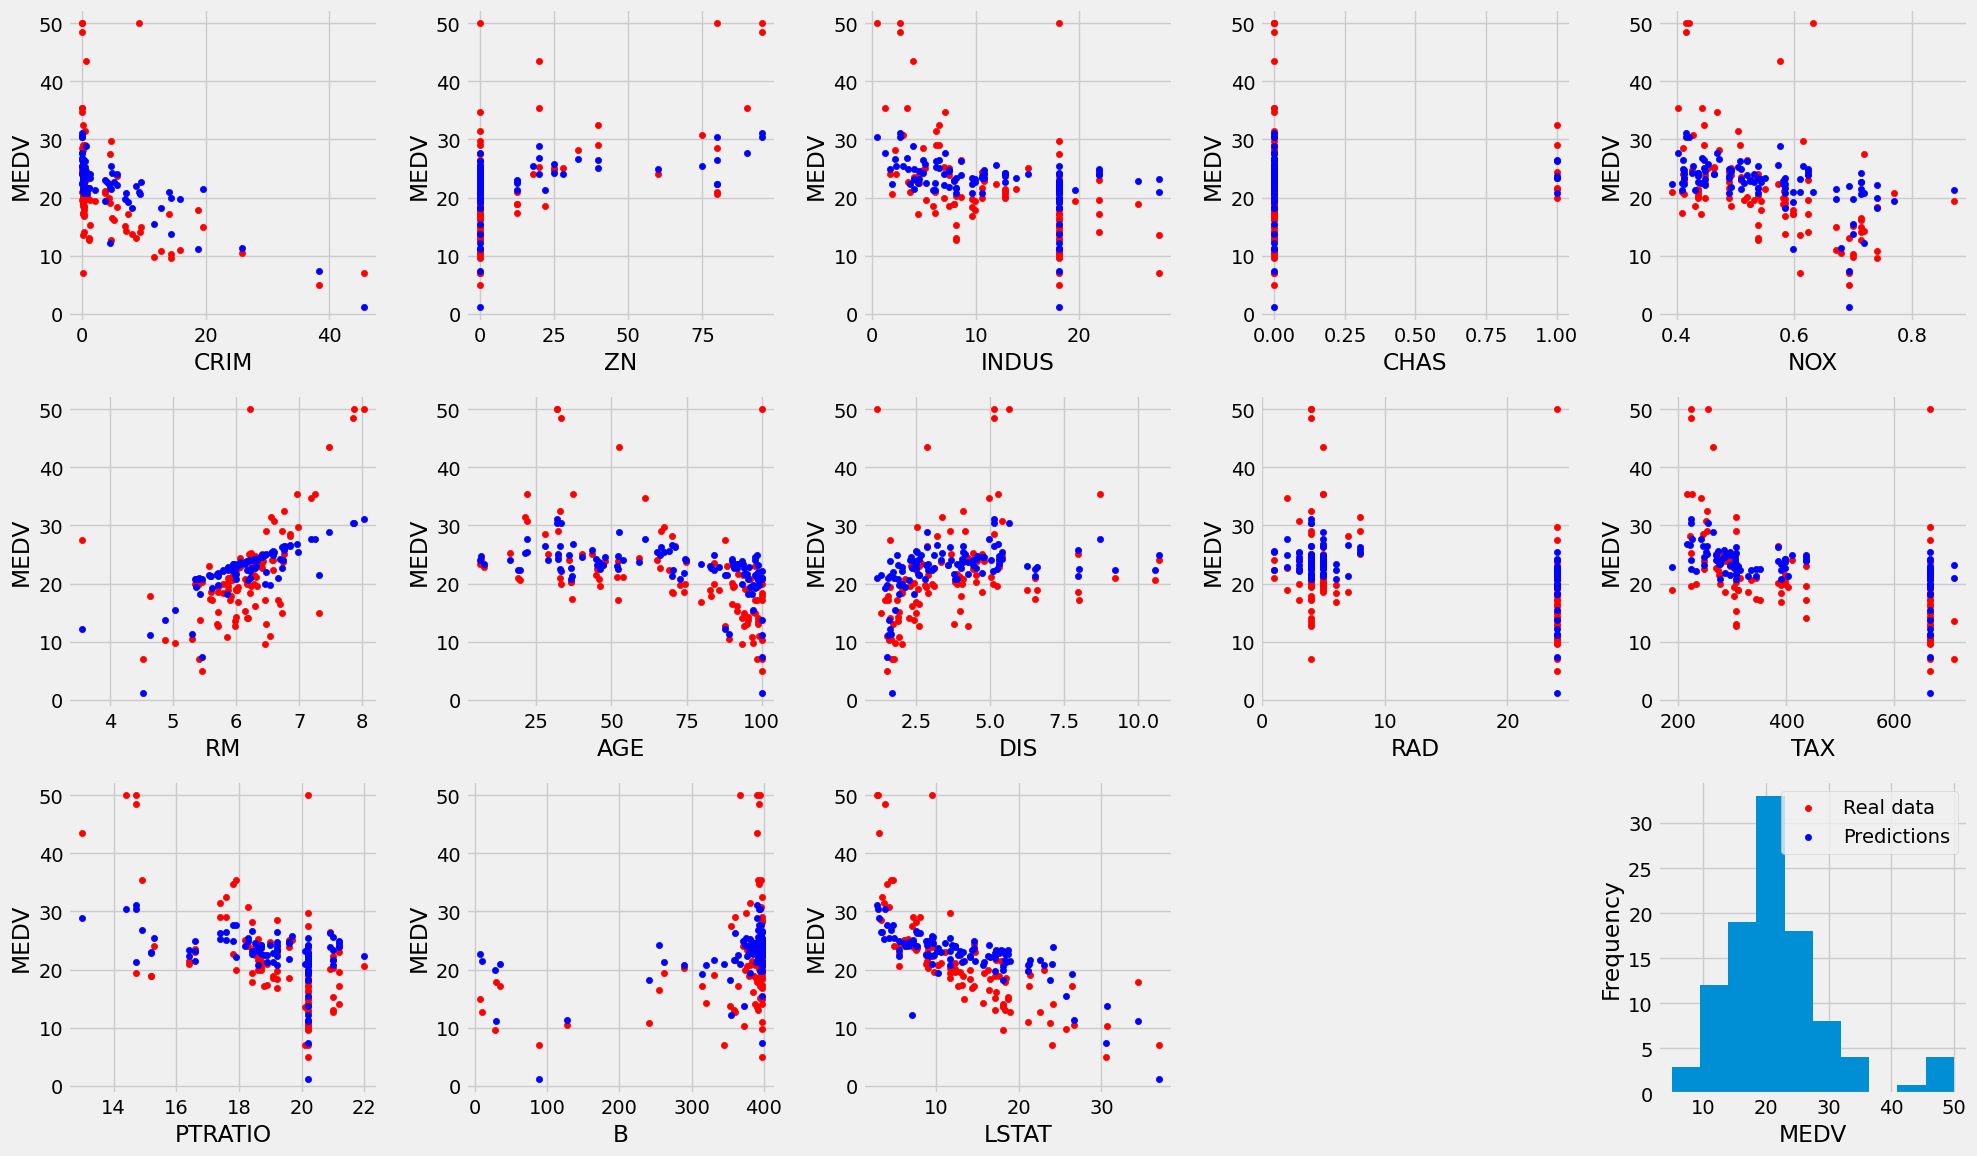

MSE: 45.49296689765942
R^2: 0.3796451657457478


(45.49296689765942, 0.3796451657457478)

In [8]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression()

train_test_print_model(model, boston, print_result=True, view_graphics=True)

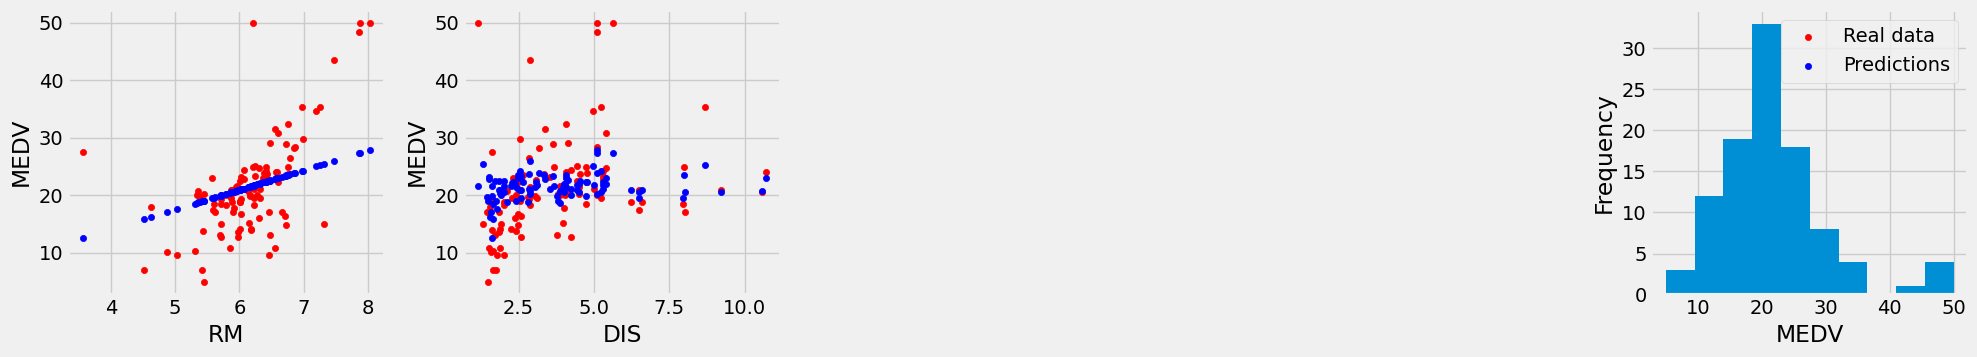

MSE: 54.51499149817569
R^2: 0.256618312204151


(54.51499149817569, 0.256618312204151)

In [9]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression()

boston.feature_names = ['RM', 'DIS']
train_test_print_model(model, boston, X=boston.data[['RM', 'DIS']].values, print_result=True, view_graphics=True)

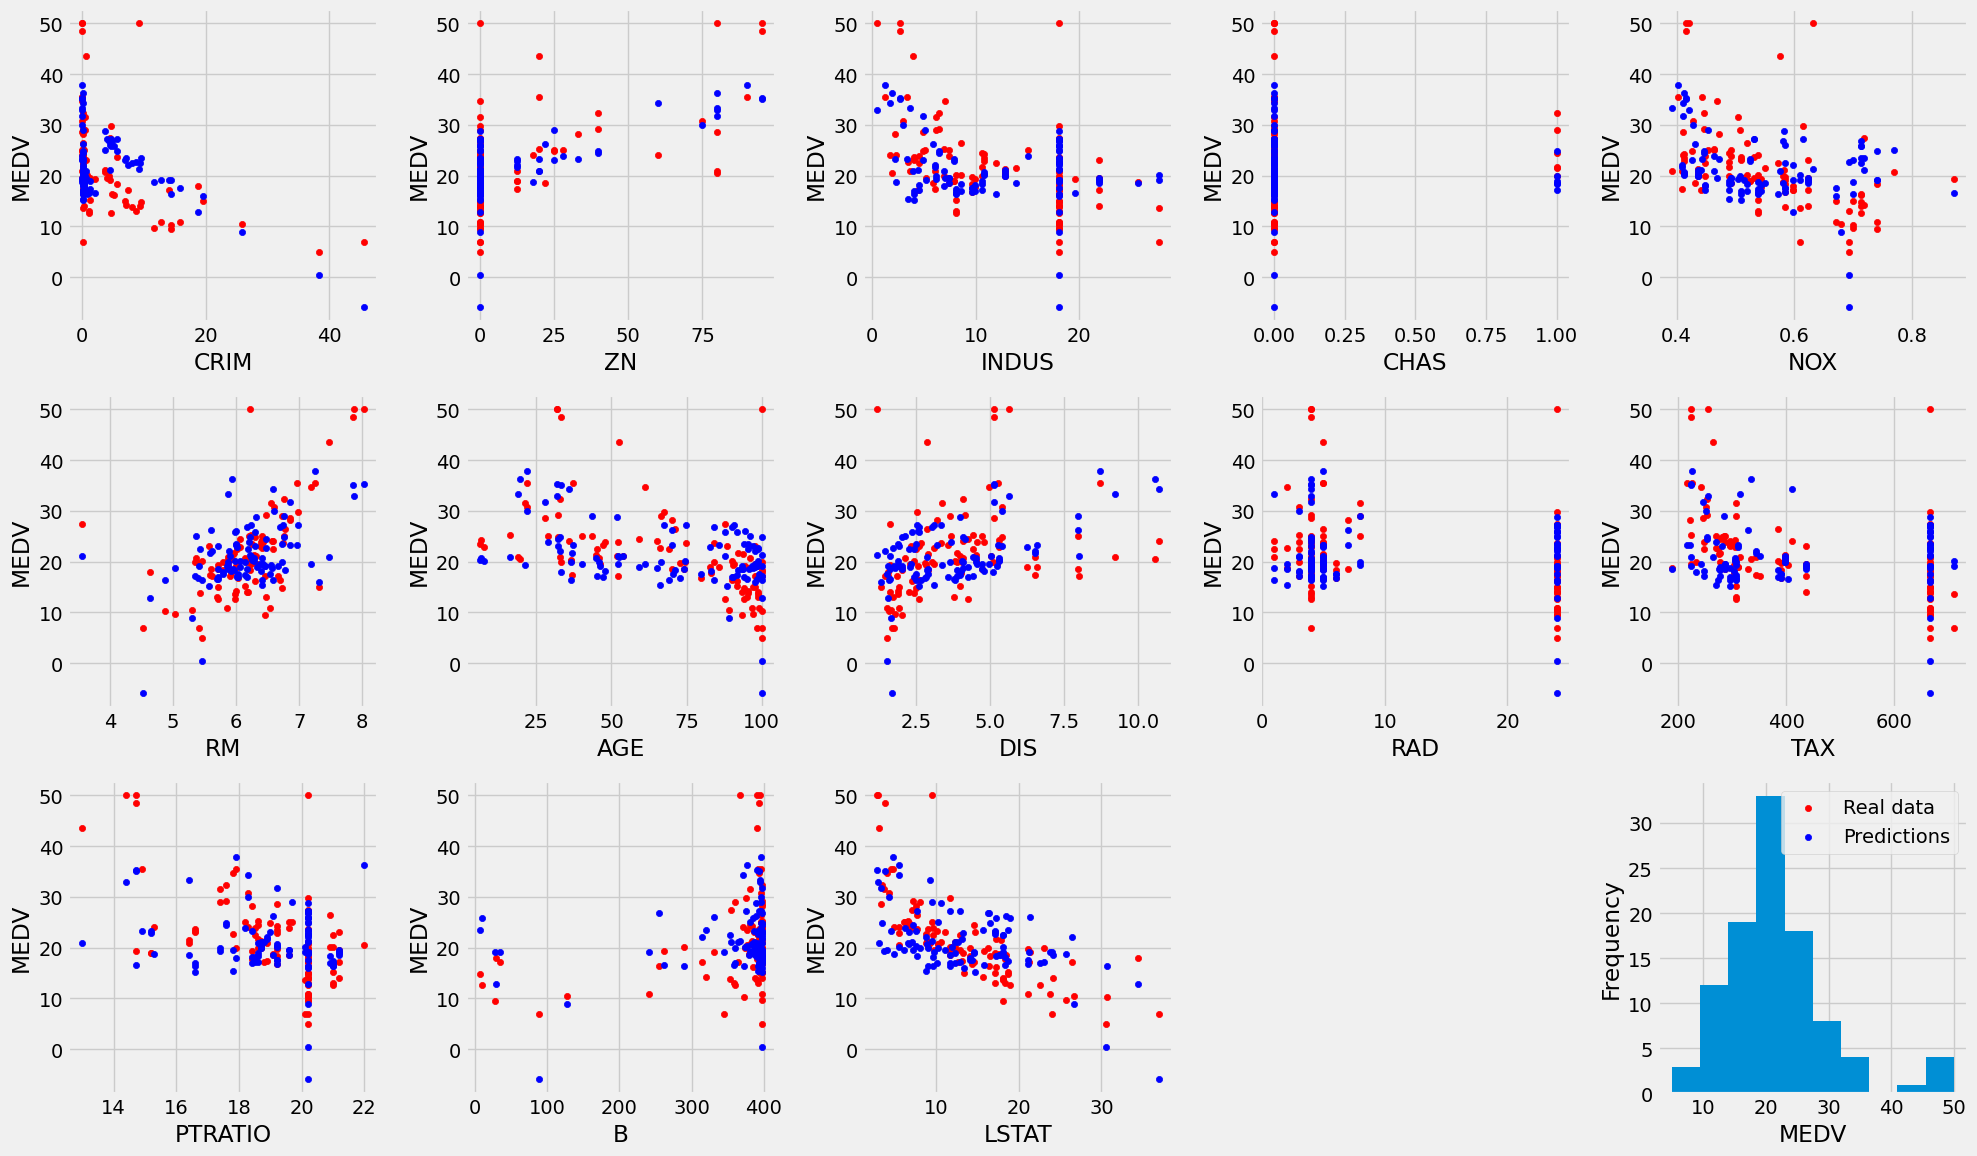

MSE: 58.77394857392711
R^2: 0.1985419810480118


(58.77394857392711, 0.1985419810480118)

In [10]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = get_model_LinearRegression(batch_size=10)

train_test_print_model(model, boston, print_result=True, view_graphics=True)